In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv', index_col='Patient ID')

In [7]:
data

,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
Patient ID,,
1,130,120
2,142,135
3,120,118
4,135,127
5,148,140
...,...,...
96,136,129
97,143,137
98,127,123


In [9]:
data.isna().sum()

 Blood Pressure Before (mmHg)    0
 Blood Pressure After (mmHg)     0
dtype: int64

# a. Measure the dispersion in both and interpret the results.


<AxesSubplot:ylabel='Count'>

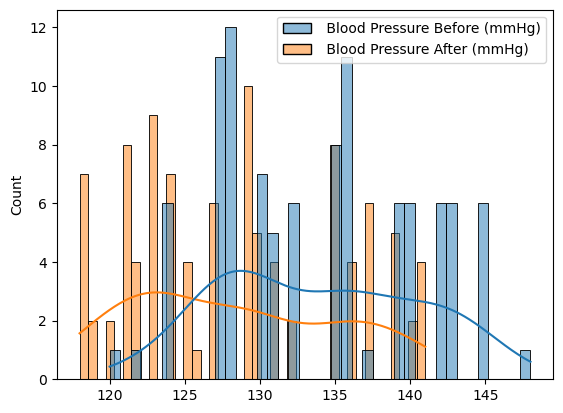

In [18]:
sns.histplot(data,common_bins=False,bins=40,kde=True)

### mean and range of blood pressure before apears to be grear than blood pressure after lets check actual values

In [19]:
data.describe()

,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
count,100.000000,100.000000
mean,133.910000,128.360000
std,6.598278,6.888022
min,120.000000,118.000000
25%,128.000000,123.000000
50%,135.000000,128.000000
75%,139.250000,135.000000
max,148.000000,141.000000


### std deviation of blood pressure after is greater than blood pressure before but as predicted before it's mean and range(max - min) is lower

## b. Calculate mean and 5% confidence interval and plot it in a graph

z_score for 5 % confidance interval is 1.96
so the formula for interval will be --> mean +/- 1.96*std

In [30]:
print(f'''mean for blood pressure before is {data[' Blood Pressure Before (mmHg)'].mean()} and 
mean for blood pressure after is {data[' Blood Pressure After (mmHg)'].mean()}''')

mean for blood pressure before is 133.91 and 
mean for blood pressure after is 128.36


In [52]:
before_upper_limit = data[' Blood Pressure Before (mmHg)'].mean() + 1.96*data[' Blood Pressure Before (mmHg)'].std()
before_lower_limit = data[' Blood Pressure Before (mmHg)'].mean() - 1.96*data[' Blood Pressure Before (mmHg)'].std()
print('5 % confidence interval for blood pressure before is - ',(before_lower_limit,before_upper_limit))

5 % confidence interval for blood pressure before is -  (120.97737509594086, 146.84262490405914)


In [53]:
after_upper_limit = data[' Blood Pressure After (mmHg)'].mean() + 1.96*data[' Blood Pressure After (mmHg)'].std()
after_lower_limit = data[' Blood Pressure After (mmHg)'].mean() - 1.96*data[' Blood Pressure After (mmHg)'].std()
print('5 % confidence interval for blood pressure after is - ',(after_lower_limit,after_upper_limit))

5 % confidence interval for blood pressure after is -  (114.8594766790545, 141.86052332094553)


In [54]:
before_interval = [before_lower_limit,before_upper_limit]
after_interval = [after_lower_limit,after_upper_limit]

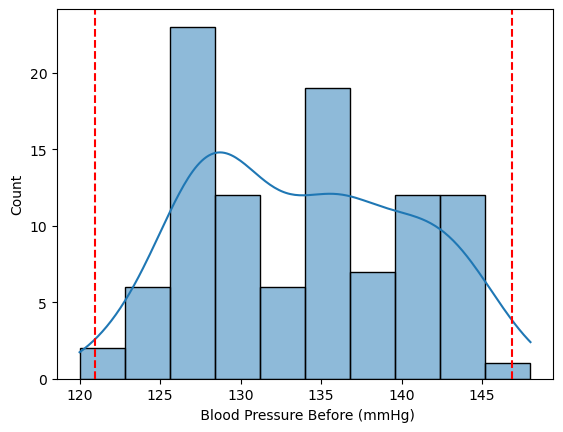

In [55]:
sns.histplot(data[' Blood Pressure Before (mmHg)'],kde=True,bins=10)
for limit in before_interval:
    plt.axvline(limit,color='red',linestyle='--')
# plt.axvspan(before_lower_limit,before_upper_limit, color='green', alpha=0.3)

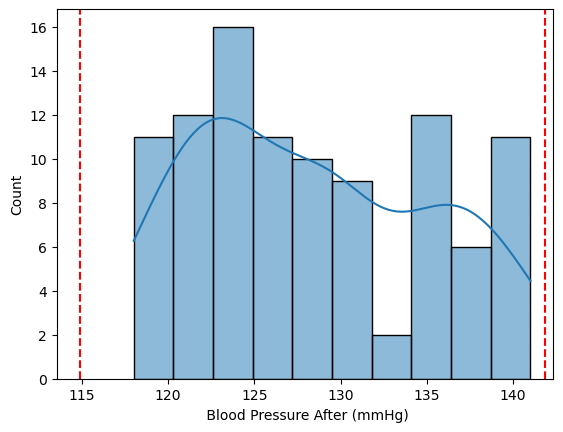

In [56]:
sns.histplot(data[' Blood Pressure After (mmHg)'],kde=True,bins=10)
for limit in after_interval:
    plt.axvline(limit,color='red',linestyle='--')

In [44]:
data[' Blood Pressure After (mmHg)'].std()

6.8880221025232276

##  Calculate the Mean absolute deviation and Standard deviation and interpret the results.

In [58]:
import numpy as np
mean = np.mean(data)

# Calculate the Absolute Deviation
abs_deviation = np.abs(data - mean)

# Calculate the Mean Absolute Deviation
mad = np.mean(abs_deviation)

C:\Users\HP\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [59]:
mad

 Blood Pressure Before (mmHg)    5.7118
 Blood Pressure After (mmHg)     5.9000
dtype: float64

In [60]:
data.std()

 Blood Pressure Before (mmHg)    6.598278
 Blood Pressure After (mmHg)     6.888022
dtype: float64

#### as we can that MAD is lower than the STD this means that data is more concentrated near mean as MAD would have effected due to presence of outliers, let's confirm this by plotting box plot

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' Blood Pressure After (mmHg)'>

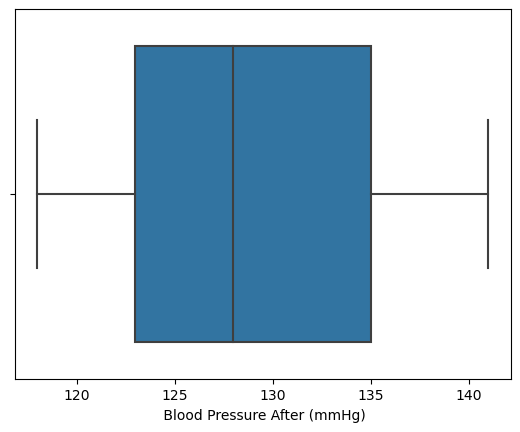

In [82]:
sns.boxplot(data[' Blood Pressure After (mmHg)'])

<AxesSubplot:>

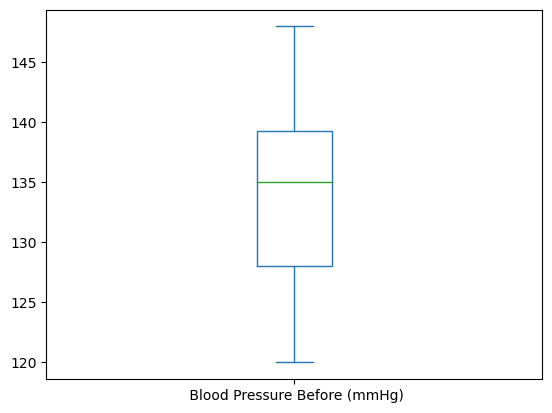

In [81]:
# sns.boxplot(data[' Blood Pressure After (mmHg)'])
data[' Blood Pressure Before (mmHg)'].plot(kind='box')

### d. Calculate the correlation coefficient and check the significance of it at 1% level of significance.

In [90]:
import scipy.stats as stats
correlation, p_value = stats.pearsonr(data.iloc[:,0],data.iloc[:,1])
# spearman test can also be used
# correlation, p_value = stats.spearmanr(data.iloc[:,0],data.iloc[:,1]) 

In [91]:
print(correlation, p_value )

0.9779485966556019 1.8097381433068541e-68


In [92]:
if p_value < 0.01:
    significance = "Significant"
else:
    significance = "Not significant"

print("Significance at 1% level:", significance)

Significance at 1% level: Significant


### blood pressure before and after shows high correlation

# question 6

In [94]:
# above graphs showed that both datas did not follow perfect normal distribution let's carry on some other tests

In [93]:
data.skew()

 Blood Pressure Before (mmHg)    0.144983
 Blood Pressure After (mmHg)     0.267724
dtype: float64

#### skewness of data increased after taking the drug

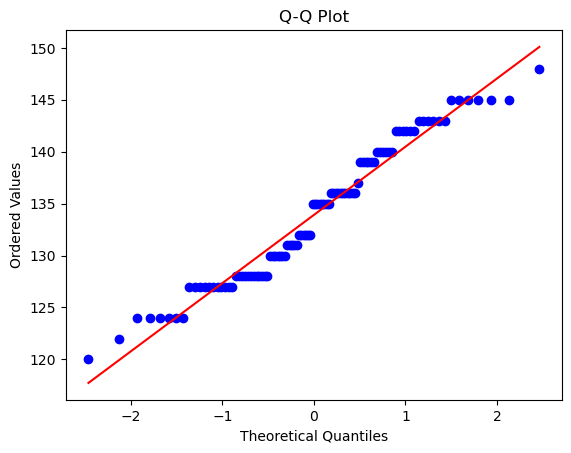

In [98]:
# lets check Q-Q plot
stats.probplot(data[' Blood Pressure Before (mmHg)'], dist="norm", plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.title('Q-Q Plot')
plt.show()

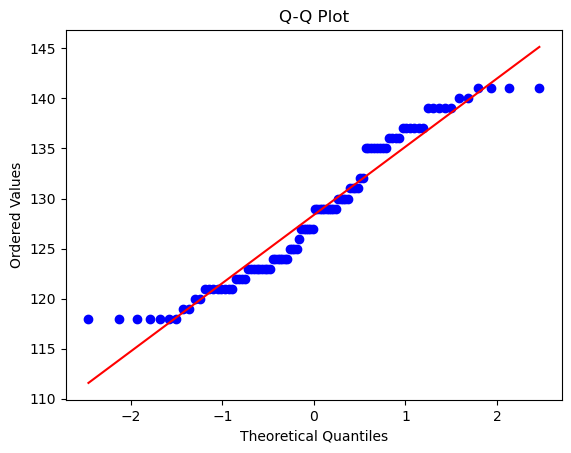

In [99]:
stats.probplot(data[' Blood Pressure After (mmHg)'], dist="norm", plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.title('Q-Q Plot')
plt.show()

### It is evident from above graphs that data does not fallow normal distribution

# question 11